In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
# Data Loading
file_path = '2018_clean_final.csv'
flight_df = pd.read_csv(file_path, error_bad_lines=False)

In [ ]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393234 entries, 0 to 4393233
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   CRS_DEP_TIME         int64  
 3   DEP_DELAY            float64
 4   TAXI_OUT             float64
 5   WHEELS_OFF           float64
 6   WHEELS_ON            float64
 7   TAXI_IN              float64
 8   CRS_ARR_TIME         int64  
 9   ARR_DELAY            float64
 10  CRS_ELAPSED_TIME     float64
 11  ACTUAL_ELAPSED_TIME  float64
 12  AIR_TIME             float64
 13  DISTANCE             float64
 14  CARRIER_DELAY        float64
 15  WEATHER_DELAY        float64
 16  NAS_DELAY            float64
 17  SECURITY_DELAY       float64
 18  LATE_AIRCRAFT_DELAY  float64
 19  Org_Airport          object 
 20  Org_latitude         float64
 21  Org_longitude        float64
 22  Origin_city          object 
 23  Dest_Airport         object 
 24

In [ ]:
flight_df.shape

(4393234, 31)

In [ ]:
flight_df.isnull().sum()

FL_DATE                0
OP_CARRIER             0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Org_Airport            0
Org_latitude           0
Org_longitude          0
Origin_city            0
Dest_Airport           1
Dest_latitude          1
Dest_longitude         1
Dest_city              1
month                  1
Day                    1
MONTH_abbr             1
DELAY_STATUS           1
dtype: int64

In [ ]:
flight_df = flight_df.dropna()

In [ ]:
flight_df.isnull().sum()

FL_DATE                0
OP_CARRIER             0
CRS_DEP_TIME           0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Org_Airport            0
Org_latitude           0
Org_longitude          0
Origin_city            0
Dest_Airport           0
Dest_latitude          0
Dest_longitude         0
Dest_city              0
month                  0
Day                    0
MONTH_abbr             0
DELAY_STATUS           0
dtype: int64

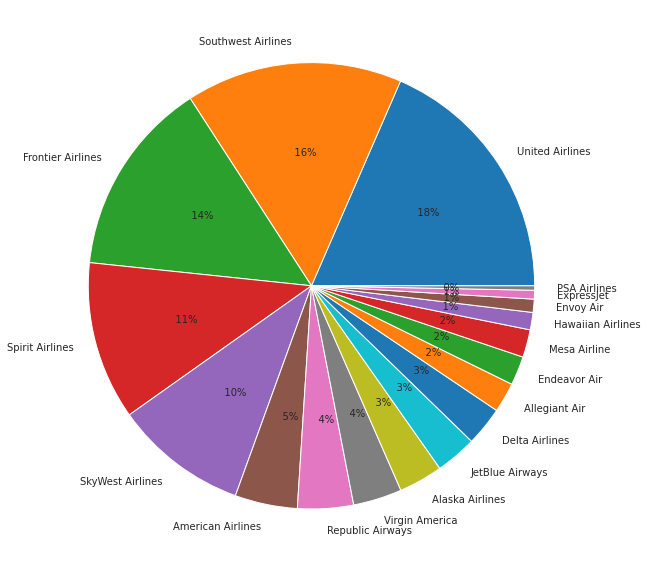

In [ ]:
axis = plt.subplots(figsize=(10,14))
Name = flight_df["OP_CARRIER"].unique()
size = flight_df["OP_CARRIER"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [ ]:
def scaling_check(data):
    
    case_count = flight_df['DELAY_STATUS'].value_counts() # 'data' is our input which will be any of the 3 dataframes created
    print('Legend:')
    print(case_count)
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=case_count.index, y=case_count.values)
    plt.rcParams["figure.facecolor"] = "lightblue"
    plt.title('Data Distribution', fontsize=16)
    plt.xlabel('Flight Status', fontsize=12)
    plt.ylabel('Number of Flights', fontsize=12)
    plt.xticks(range(len(case_count.index)), ['ON TIME(0)', 'DELAYED(1)'])
    plt.show()

Legend:
0.0    2755303
1.0    1637930
Name: DELAY_STATUS, dtype: int64


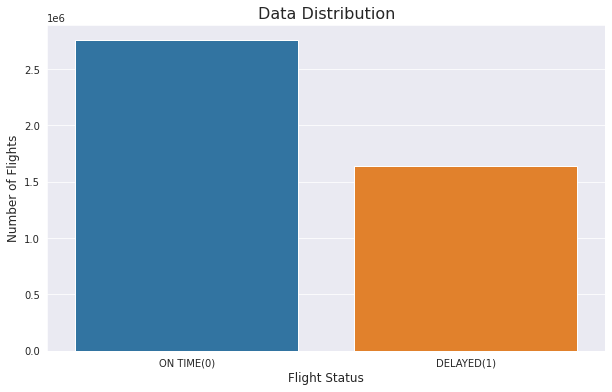

In [ ]:
scaling_check(flight_df)

In [ ]:
flight_df['flight_name'] = flight_df['OP_CARRIER'].astype('category')
flight_df['MONTH_abbr'] = flight_df['MONTH_abbr'].astype('category')



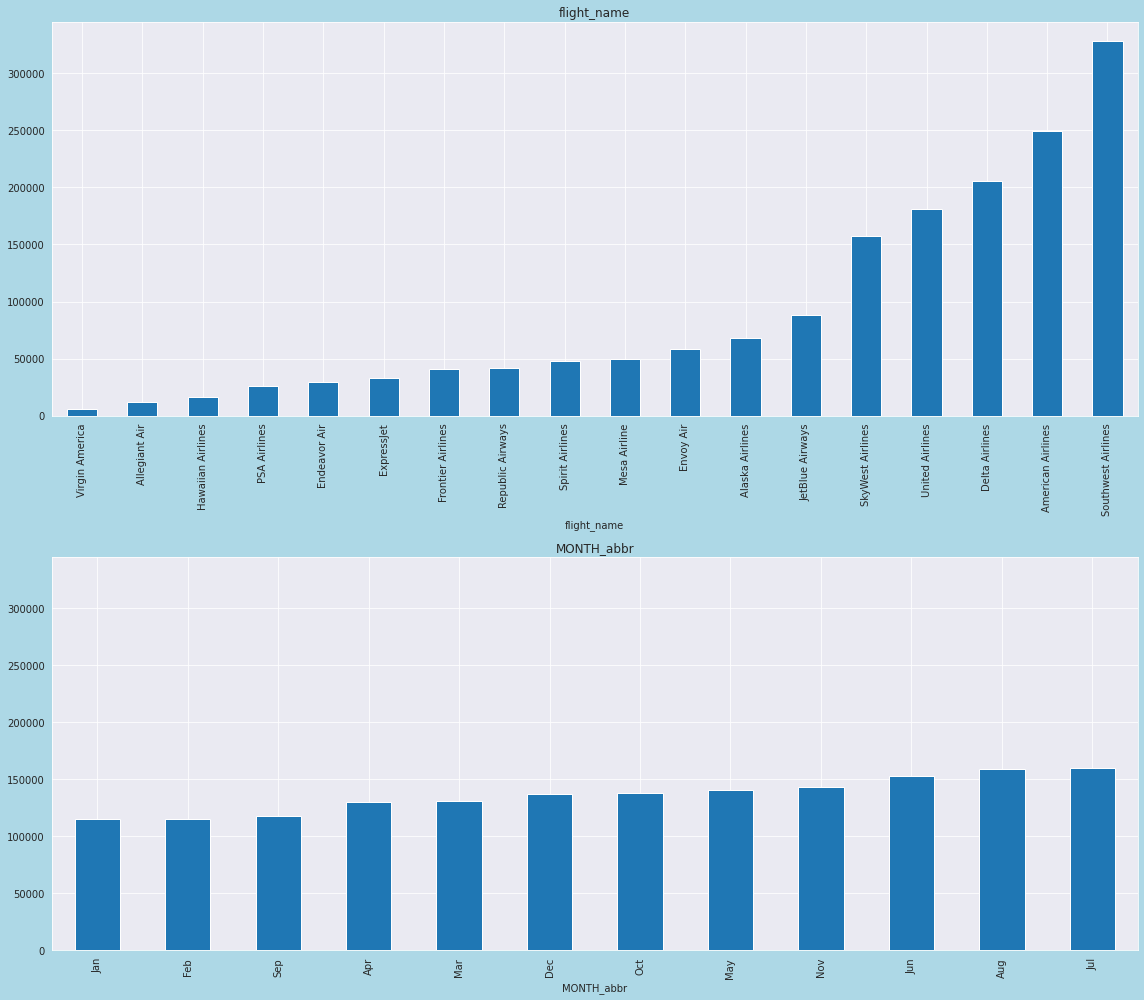

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,14), sharey=True)

categoricals = ['flight_name','MONTH_abbr']

for col, ax in zip(categoricals, axes.flatten()):
    (flight_df.groupby(col).sum()['DELAY_STATUS'].sort_values().plot.bar(ax=ax))
    
    ax.set_title(col)
    
fig.tight_layout()



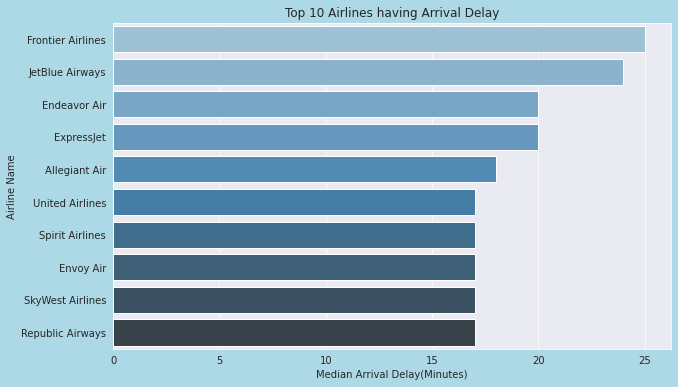

In [ ]:
airline_arr = flight_df[flight_df['ARR_DELAY']>0]
airline_arr = airline_arr[['flight_name','ARR_DELAY']]
airline_arr = airline_arr.groupby(['flight_name'])['ARR_DELAY'].median().reset_index()
airline_arr = airline_arr.sort_values(by='ARR_DELAY', ascending=False, na_position='first').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='ARR_DELAY', 
            y='flight_name', 
            data=airline_arr, 
            order=airline_arr.sort_values('ARR_DELAY',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('Median Arrival Delay(Minutes)')
plt.title('Top 10 Airlines having Arrival Delay')
plt.show()



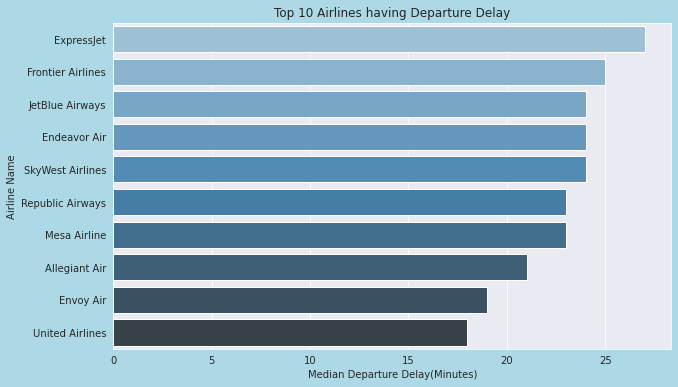

In [ ]:
airline_dept = flight_df[flight_df['DEP_DELAY']>0]
airline_dept = airline_dept[['flight_name','DEP_DELAY']]
airline_dept = airline_dept.groupby(['flight_name'])['DEP_DELAY'].median().reset_index()
airline_dept = airline_dept.sort_values(by='DEP_DELAY', ascending=False, na_position='first').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='DEP_DELAY', 
            y="flight_name", 
            data=airline_dept, 
            order=airline_dept.sort_values('DEP_DELAY',ascending = False).flight_name,
           palette="Blues_d")
plt.ylabel('Airline Name')
plt.xlabel('Median Departure Delay(Minutes)')
plt.title('Top 10 Airlines having Departure Delay')
plt.show()

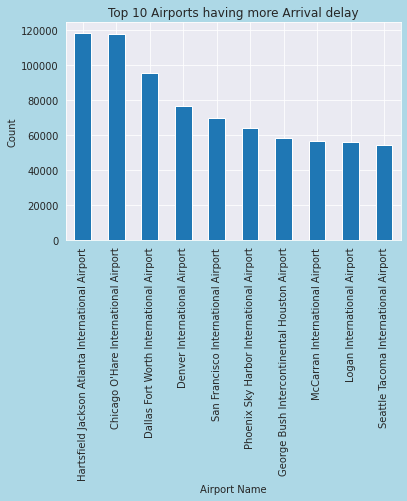

In [ ]:
delay_air_ports = flight_df[flight_df['ARR_DELAY'].notnull()]
delay_air_ports = delay_air_ports[delay_air_ports['Dest_Airport'].notnull()]
delay_air_ports = delay_air_ports[delay_air_ports['Dest_Airport'] != " "]
delay_air_ports = delay_air_ports[['ARR_DELAY','Dest_Airport']]
delay_air_ports['delay'] = np.where(delay_air_ports['ARR_DELAY'] >= 1, True, False)
delay_air_ports = delay_air_ports[delay_air_ports['delay']== True]
delay_air_ports = delay_air_ports['Dest_Airport']
delay_air_ports.value_counts()[:10].plot.bar(xlabel="Airport Name", ylabel="Count",title = 'Top 10 Airports having more Arrival delay')

In [ ]:
df = flight_df[flight_df['Dest_Airport']== " "]
df.head()

,FL_DATE,OP_CARRIER,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Org_Airport,Org_latitude,Org_longitude,Origin_city,Dest_Airport,Dest_latitude,Dest_longitude,Dest_city,month,Day,MONTH_abbr,DELAY_STATUS,flight_name
742867,2018-01-01,United Airlines,1500,15.0,19.0,1534.0,1804.0,8.0,1820,-8.0,380.0,357.0,330.0,2454.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,,33.942501,-118.407997,Los Angeles,1.0,1.0,Jan,0.0,United Airlines
742868,2018-01-01,United Airlines,1200,5.0,14.0,1219.0,1457.0,6.0,1512,-9.0,372.0,358.0,338.0,2454.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,,33.942501,-118.407997,Los Angeles,1.0,1.0,Jan,0.0,United Airlines
742869,2018-01-01,United Airlines,712,-1.0,17.0,728.0,958.0,38.0,1035,1.0,383.0,385.0,330.0,2454.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,,33.942501,-118.407997,Los Angeles,1.0,1.0,Jan,1.0,United Airlines
742870,2018-01-01,United Airlines,1730,-2.0,24.0,1752.0,2016.0,9.0,2048,-23.0,378.0,357.0,324.0,2454.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,,33.942501,-118.407997,Los Angeles,1.0,1.0,Jan,0.0,United Airlines
742871,2018-01-01,United Airlines,1420,14.0,18.0,1452.0,1726.0,22.0,1738,10.0,378.0,374.0,334.0,2454.0,0.0,0.0,0.0,0.0,0.0,Newark Liberty International Airport,40.692501,-74.168701,New York,,33.942501,-118.407997,Los Angeles,1.0,1.0,Jan,1.0,United Airlines


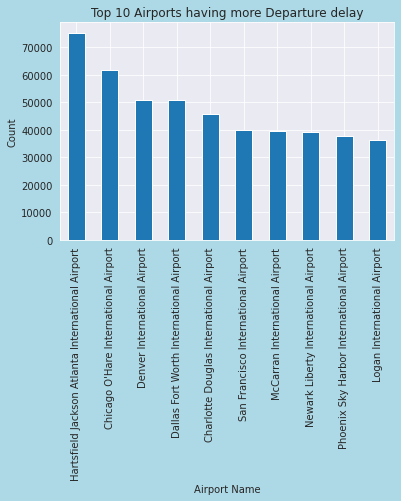

In [ ]:
delay_air_port = flight_df[flight_df['DEP_DELAY'].notnull()]
delay_air_port = delay_air_port[delay_air_port['Org_Airport'].notnull() ]
delay_air_port = delay_air_port[delay_air_port['Org_Airport'] != " "]
delay_air_port = delay_air_port[['DEP_DELAY','Org_Airport']]
delay_air_port['delay'] = np.where(delay_air_port['DEP_DELAY'] > 0, True, False)
delay_air_port = delay_air_port[delay_air_port['delay']== True]
delay_air_port = delay_air_port['Org_Airport']
delay_air_port.value_counts()[:10].plot.bar(xlabel="Airport Name", ylabel="Count",title = 'Top 10 Airports having more Departure delay')